# Protein Abundance and Phosphorylation Analysis

In [12]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import altair as alt

#alt.renderers.enable('notebook')
import CPTAC

In [13]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# Protein Abundance

### Take out the control group (patients 101 - 140)

In [14]:
proteomics = proteomics[:100]

In [15]:
protList = ['AKT1']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

<b> Plot the data </b>

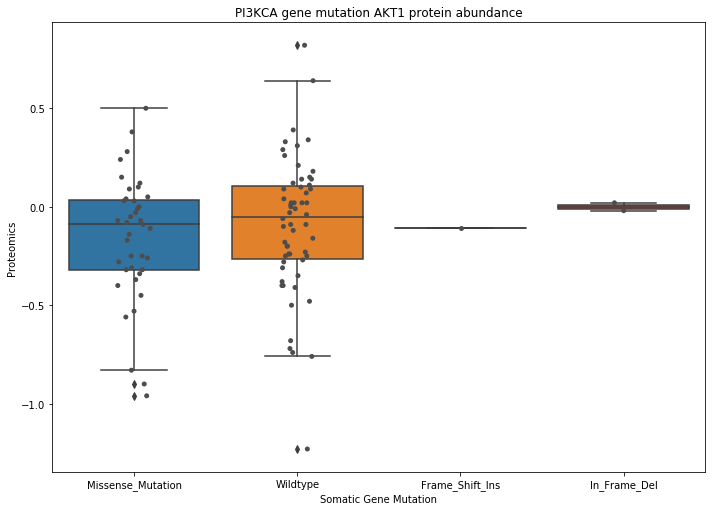

In [16]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='AKT1', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation AKT1 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='AKT1',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

Note: protein abundance of AKT1 when PIK3CA mutated not significantly different than non-mutated PIK3CA

# Phosphorylation 

In [18]:
sites = phos.columns;
significantPhosResults = [];
totalSites = 0

phosProtList = ['AKT1']

for protein in phosProtList:
    matchesdf = phos.filter(regex=protein)
    totalSites += len(matchesdf.columns)

pcutoff = 0.05 / totalSites

    

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                if(ttest[1] <= pcutoff):
                    #significantResults.append(site)
                    print("Test for " + site + ": ")
                    print(ttest)    

Gene Patient_Type not found in phosphoproteomics data


AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[5])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[5] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[5],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

<b> Checking the phosphorylation level of any form of AKT </b>

In [ ]:
phosProt = phos.filter(regex='AKT')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)

Note: None yielded significant results 